# Guerrieri and Lorenzoni (2017)

# Credit Crises, Precautionary Savings, and The Liquidity Trap

Notebook created by William Du and Tung Sheng Hsieh

This notebook uses the Econ-ARK/HARK toolkit to replicate the results of Guerrieri and Lorenzoni (2017). We create a new AgentType, GLConsumerType, that inherits the IndShockConsumerType and a Solver, GLSolver, that inherits the ConsIndShockSolver. 

We managed to closely replicate the initial Optimal Consumption and Labor Supply Steady States found Figure 1 of the paper. 


## Summary

This paper uses a heterogeneous agents model with incomplete markets and endogenous labor supply to analyze the effects of a credit crunch on consumer spending. 

Main Findings: 

(i) A credit crunch leads to a fall in consumption and real interest rates due to a forced deleveraging and an increase in precautionary savings.

(ii) Adding nominal rigidities to the baseline model may  exacerbate the effects on output as the zero lower bound may prevent the real interest rate from falling sufficiently in order to attain the flexible price equilibrium.

(iii) Adding durable goods to the baseline model does not fundamentally alter the baseline result mentioned in (i). In this extension, there is a fall in consumption in both non durables and durables for credit constrained consumers and an increase in precautionary savings through durables and bonds for net lenders.  

## Non-Technical Overview

The authors consider a heterogeneous agents model where there is a continuum of infinitely lived households with idiosyncratic uncertainty to their labor productivity and subject to a borrowing limit.  In order to understand the effects of a credit crunch, the authors analyze how a shock to the borrowing limit (a tightening in credit) influences each household's consumption decision and the resulting interest rate dynamics. 

## Baseline Model

#### Households/Producers

There is a continuum of infinitely lived households with preferences represented by
the utility function: $$
\mathrm{E}\left[\sum_{t=0}^{\infty} \beta^{t} U\left(c_{i t}, n_{i t}\right)\right]
$$

where $U(c, n)=\frac{c^{1-\gamma}}{1-\gamma}+\psi \frac{(1-n)^{1-\eta}}{1-\eta}$

Each household \textit{i} chooses $c_{it}$ and $n_{it}$ to maximize their lifetime expected utility  subject to their household budget constraint described below. Production is dependent on the choice of $n_{it}$
$$
y_{i t}=\theta_{i t} n_{i t}
$$

where $ \theta_{i t}$ is an idiosyncratic shock to the labor productivity of  household \textit{i}, which follows a Markov chain on the space $\left\{\theta^{1}, \ldots, \theta^{S}\right\}$. Let $\theta^{1} =0$.

#### Household Budget Constraint

$$
q_{t} b_{i t+1} +c_{i t}+\tilde{\tau}_{i t} \leq b_{i t}+y_{i t}
$$

where $q_{t}$ is the bond price, $\tilde{\tau}_{i t}$ are taxes such that $\tilde{\tau}_{i t}=\tau_{t}$ if $\theta_{i t}>0$ and $\tilde{\tau}_{i t}=\tau_{t}-v_{t}$ if $\theta_{i t}=0$ where $v_{t}$ is unemployment insurance. $b_{i t+1}$ are bond holdings.

Household debt is bounded below by an exogenous limit $\phi > 0$. That is,

$$b_{i t+1} \geq-\phi$$

A credit crunch is equivalent to lowering the value of $\phi$.

#### Government

The government chooses the aggregate supply of bonds $B_{t}$, the unemployment benefit $v_{t}$ and the lump sum tax $\tau_{t}$ so as to satisfy the budget constraint

$$B_{t}+v_{t} u=q_{t} B_{t+1}+\tau_{t}$$

where where u = Pr ($\theta_{it}$ = 0) is the fraction of unemployed agents in the population.

We assume that the supply of government bonds $B$ and unemployment insurance $v$ are kept constant.
Taxes $\tau$ adjust to ensure the government budget balances.

### Dynamic Program


For household i, the Bellman equation is

$$
\begin{aligned}
V_{it}(b_{it}, \theta_{it})=\max _{c_{it}, n_{it}, b_{it+1}} & U(c_{it}, n_{it})+\beta E\left[V\left(b_{it+1}, \theta_{it+1}\right) \mid \theta_{it}\right] \\
\text { s.t. } & b_{it}+\theta_{it} n_{it} -\tau(\theta_{it}) \geq q_{t} b_{it+1}+c_{it}, \\
& b_{it+1}+\phi \geq 0
\end{aligned}
$$

## Calibration Summary

The table below indicates the calibrations for the initial steady state.

|  Parameter  | MATLAB    | HARK |  Value   | Description  |
|:---------:|:---------:|:----:|:--------|:-----------|
| $\gamma$  |   `gam`   | `CRRA`     | $4$ | Coefficient of relative risk aversion  |
| $r$         |`r`     |  `Rfree-1`            | $0.00625$| Quarterly  interest rate |
| $\eta$    | `eta`     |  `eta`    | $1.5$  | Curvature of utility from leisure  |
| $\beta$   | `bet`     | `DiscFac`     | $0.9457$ | Discount factor       |
| $v$ | `nu` | `nu` | $0.16$ | UI benefits |
| $B$ | `B` | `B` | $2.56$ | Net supply of bonds |
| $\psi$    | `pssi`    |  `pssi`    | $18.154609$         | Disutility from labor |
| $\phi$      | `phi` |  `-BoroCnstArt`       | $1.60$ | Borrowing limit|
| $\pi_{e,u}$ | `sep` | `sep`       | $0.0573$            | Separation probability|
| $\pi_{u,e}$ | `fin` |  `fin`      | $0.8820$    | Job-finding probability  |
| $\rho$    |           |      | $0.967$                                  | Persistence of wage process |
| $\sigma^2_\varepsilon$||     | $0.017$| Variance of wage process |


The last 4 parameters are used to construct the Markov Transition matrix. 
The wage process defined by $\rho$ and $\sigma^2_\varepsilon$ is approximated by a 12 state markov chain following the approach in Tauchen (1986). The authors perform this approximation outside of the code provided and load the resulting 12 x 12 markov array from inc_process.mat which will be seen below when the complete 12 x 13 markov transition Matrix is constructed.
The state of unemployment ($\theta_{it}=0$) is then added to this 12 state markov chain to create a 13 x 13 Markov Transition Matrix. 

## Results

#### Baseline Model

Consumers who's borrowing constraint was slack are forced to deleverage when the borrowing limit falls. These consumers both increase their labor supply and reduce their consumption. Furthermore, this deleveraging requires in an increase in  the demand for bonds to a fall in the real interest rate.

There is an increase in precautionary savings for non-constrained consumers (who are not at the right tail of the initial bond distribution) in order to buffer themselves against future shocks. Increasing their precautionary motive requires an increase in the demand for bonds leading the real interest rate to fall.

Only highly productive consumers (those who did not experience a significant negative productivity shock) will decumulate bonds and increase consumption from lowered interest rates.


# Replication

In [43]:
from time import process_time
from copy import deepcopy, copy
import numpy as np
from HARK.ConsumptionSaving.GLModel import GLConsumerType
from HARK.distribution import DiscreteDistribution
from scipy.io import loadmat
from HARK.utilities import plotFuncs
from time import time
mystr = lambda number: "{:.4f}".format(number)

### Construct Markov Transition Matrix

In [55]:
#Import income process to build transition matrix
Matlabdict = loadmat('inc_process.mat')
data = list(Matlabdict.items())
data_array=np.asarray(data)
Pr=data_array[4,1]
pr = data_array[5,1]
    
fin   = 0.8820    #job-finding probability
sep   = 0.0573    #separation probability        
        
        
#constructing transition Matrix
G=np.array([1-fin]).reshape(1,1)
A = np.concatenate((G, fin*pr), axis=1)
K= sep**np.ones(12).reshape(12,1)
D=np.concatenate((K,np.multiply((1-sep),Pr)),axis=1)
MrkvArray = np.concatenate((A,D))

### Dictionary for Parameters

In [52]:


GLDict={
    # Parameters shared with the perfect foresight model
    "CRRA": 4.0,                           # Coefficient of relative risk aversion
    "Rfree": 1.00625*np.ones(13),          # Interest factor on assets
    "DiscFac": .9457,                      # Intertemporal discount factor
    "LivPrb" : [1.00*np.ones(13)],         # Survival probability
    "PermGroFac" :[1.00*np.ones(13)],      # Permanent income growth factor

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [0.0],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 1,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.0],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 1,                    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0,                        # Probability of unemployment while working
    "IncUnemp" : 0,                        # Unemployment benefits replacement rate
    "UnempPrbRet" : 0,                     # Probability of "unemployment" while retired
    "IncUnempRet" : 0,                     # "Unemployment" benefits when retired
    "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
    "tax_rate" : 0.0,                      # Flat income tax rate (legacy parameter, will be removed in future)

    # Parameters for constructing the "assets above minimum" grid
    "aXtraMin" : .000006,                  # Minimum end-of-period "assets above minimum" value
    "aXtraMax" : 50,                       # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 182,                    # Number of points in the base grid of "assets above minimum"
    "aXtraNestFac" : 3,                    # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraExtra" : [None],                 # Additional values to add to aXtraGrid

    # A few other paramaters
    "BoroCnstArt" : -1.6,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "vFuncBool" : True,                    # Whether to calculate the value function during solution
    "CubicBool" : False,                   # Preference shocks currently only compatible with linear cFunc
    "T_cycle" : 1,                         # Number of periods in the cycle for this agent type

    # Parameters only used in simulation
    "AgentCount" : 10000,                  # Number of agents of this type
    "T_sim" : 120,                         # Number of periods to simulate
    "aNrmInitMean" : -6.0,                 # Mean of log initial assets
    "aNrmInitStd"  : 1.0,                  # Standard deviation of log initial assets
    "pLvlInitMean" : 0.0,                  # Mean of log initial permanent income
    "pLvlInitStd"  : 0.0,                  # Standard deviation of log initial permanent income
    "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor
    "T_age" : None,                        # Age after which simulated agents are automatically killed
    
    # Additional Parameters specific to Guerrieri et Lorenzoni
    "MrkvArray" : [MrkvArray],             # Markov Transition Matrix
    'eta': 1.5,                            # Curvature of utility from leisure
    'nu': 0.16,                            # UI benefits
    'pssi': 18.154609,                     # Coefficient on leisure in utility
    'B': 2.56,                             # Bond Supply
}


### Construct degenerate Income Distribution 

In [45]:
IncomeDstnReg = DiscreteDistribution(np.ones(1), [np.ones(1), np.zeros(1)]) 
IncomeDstn = 13*[IncomeDstnReg]


Since the GLConsumerType is a subclass of the IndShockConsumerType , we must specify an income distribution. 
However, because there are no transitory nor permanent shocks to income in the model, the Income distribution is degenerate. 

### Create an Instance of the GLConsumerType

In [46]:
GLexample = GLConsumerType(**GLDict)
GLexample.IncomeDstn = [IncomeDstn]

This code should take 8 seconds 


### Solve the Agent's Problem

In [47]:
start_time = time()
GLexample.solve()
end_time = time()
print(
    "Solving a GLexample took "
    + mystr(end_time - start_time)
    + " seconds."
)

C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)


Solving a GLexample took 8.9535 seconds.


## Initial Steady States  

### Consumption Functions for  $ \theta_{it} = \theta^{2} , \theta^{8}$

C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)


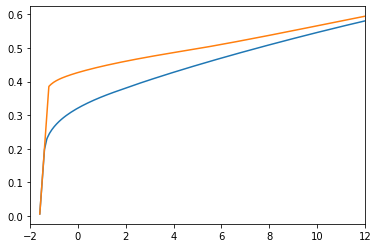

In [56]:
plotFuncs([GLexample.solution[0].cFunc[1], 
           GLexample.solution[0].cFunc[7]
           ], -2, 12)
#note due to the fact that python's index begins at 0, cFunc[i] is the consumption function for when \theta^{i+1


It is apparent that consumption varies with bond holdings.  At high levels of bond holdings, the consumer's behavior is similar to that of the Permanent Income Hypothesis. The consumption function is concave due to the precautionary motive as there is positive probability that the agent will be unemployed.

### Labor Supply Functions for $ \theta_{it} = \theta^{2} , \theta^{8}$

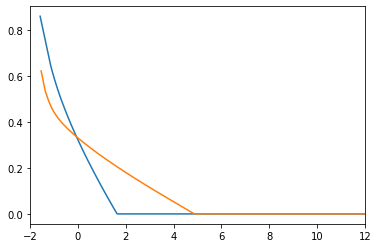

In [49]:
plotFuncs([GLexample.solution[0].LFunc[1],
           GLexample.solution[0].LFunc[7]
           ], -2, 12)

The labor supply functions are convex as higher levels of bond holdings capture an income effect that in turn lowers the amount of labor supplied. 

## Figures in Paper

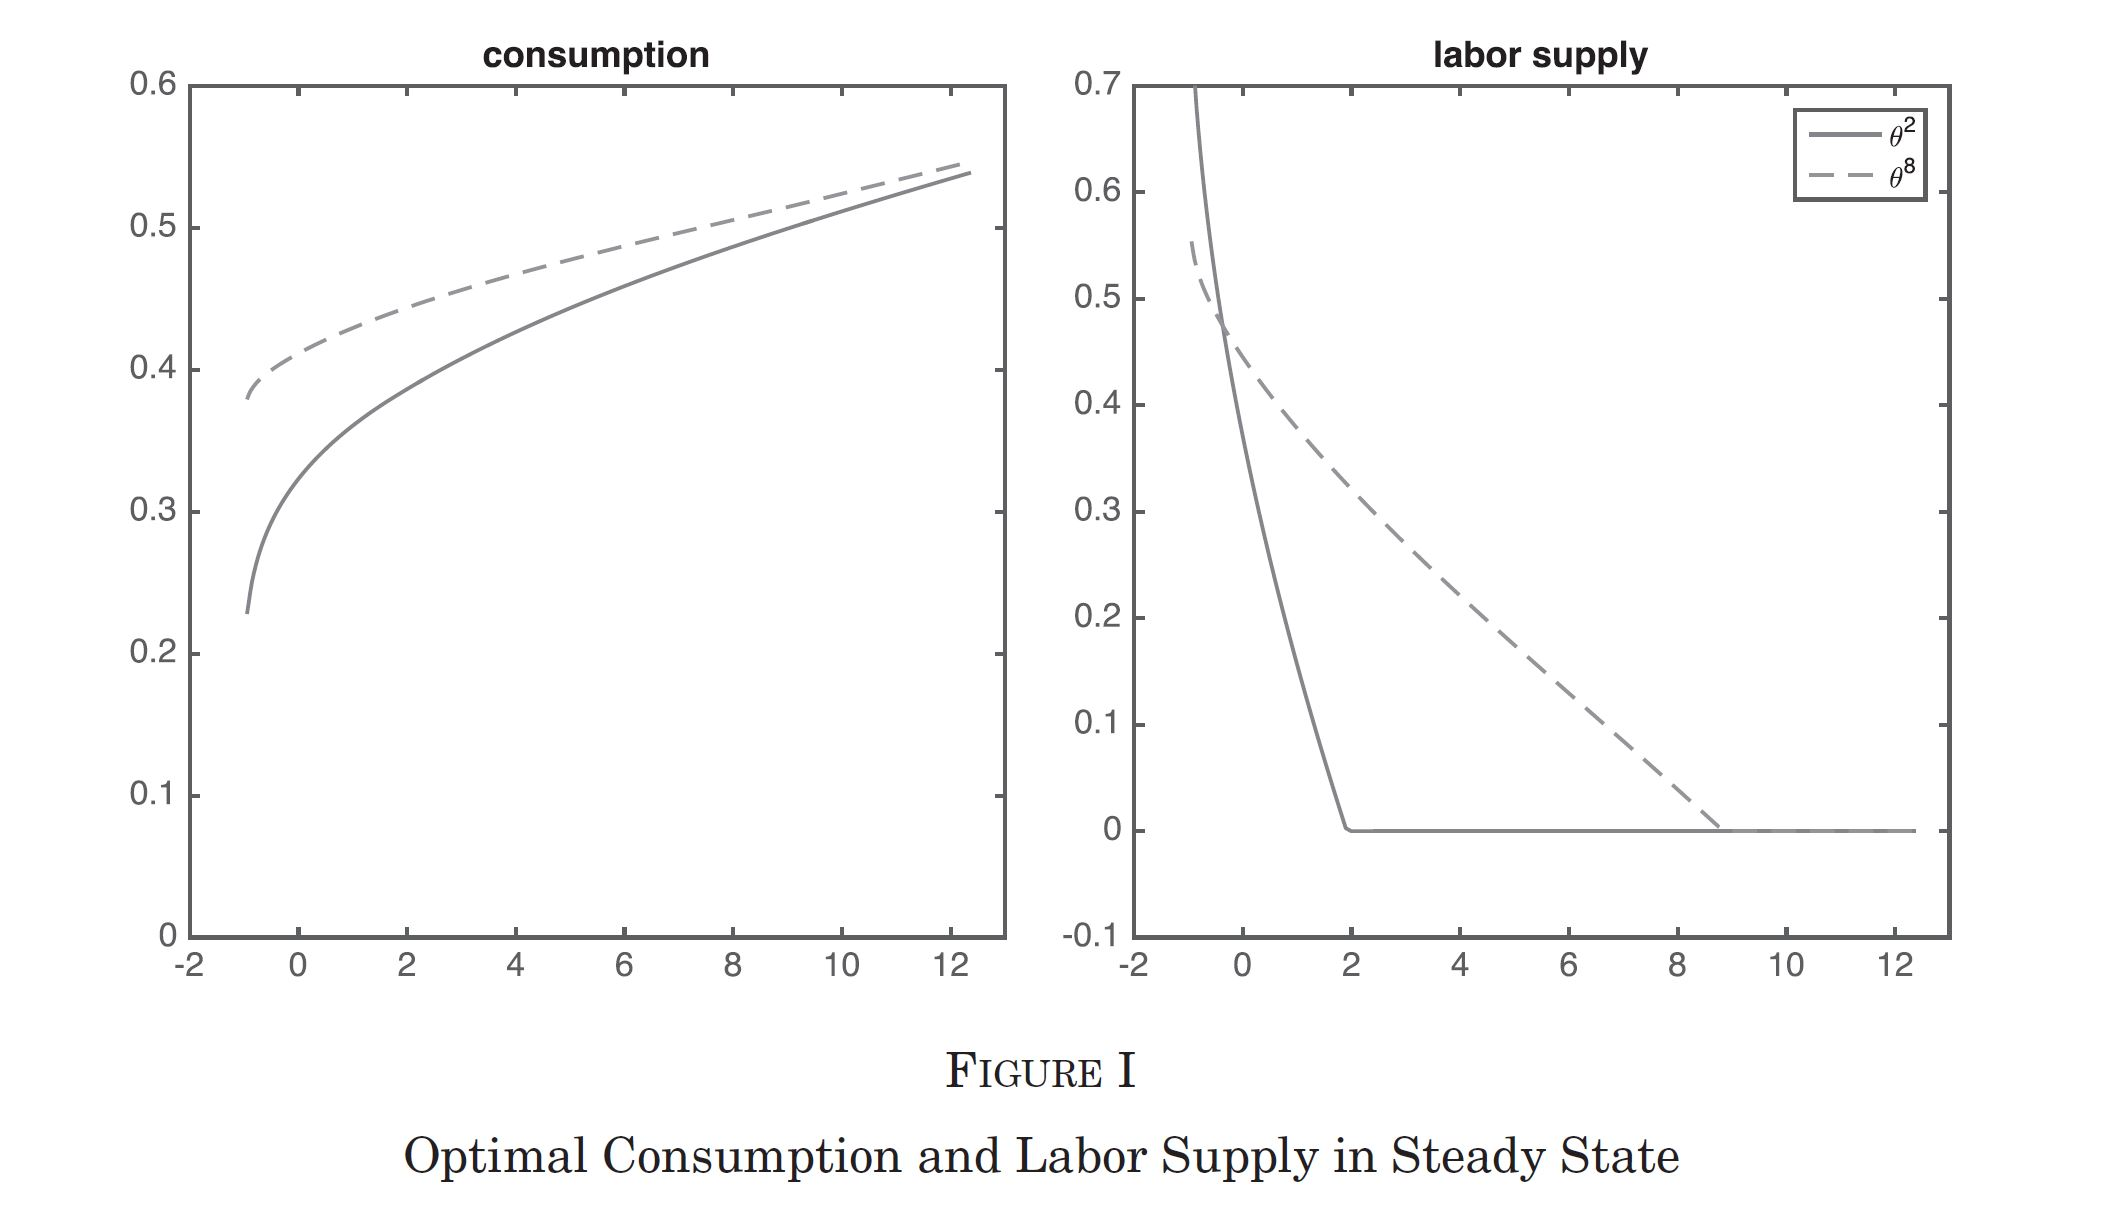

The figures produced in our code closely resemble those found in the paper. The only notable difference is the labor supply function when $ \theta_{it} = \theta^{8}$.

## Optimal Consumption and Labor Supply for All $\theta_{it}$

C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Users\wdu\Anaconda3\lib\site-packages\HARK\interpolation.py:2078: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)
C:\Use

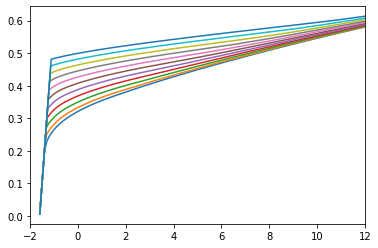

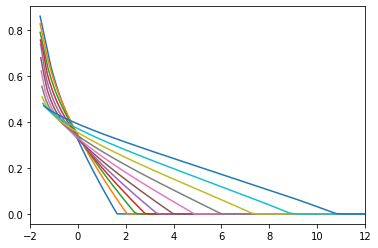

In [50]:
plotFuncs(GLexample.solution[0].cFunc[1:12], -2, 12)
plotFuncs(GLexample.solution[0].LFunc[1:12],-2, 12)


